<a href="https://colab.research.google.com/github/ktripa/CPSC-8430-HW1/blob/main/Q3_3Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow import keras 
from matplotlib import pyplot as plt


ImportError: ignored

In [31]:
mnist=keras.datasets.mnist
(train_images,train_labels), (test_images,test_labels) = mnist.load_data()
train_images= tf.keras.utils.normalize(train_images,axis=1)
test_images= tf.keras.utils.normalize(test_images,axis=1)

# For batch **Size**

In [61]:
batch=[32,1024]
alpha=np.arange(0,3,0.2)
n_batch=np.zeros([len(alpha)])
for i in range(len(alpha)):
  n_batch[i]=batch[0]*(1-alpha[i])+alpha[i]*batch[1]
n_batch.astype(int)
#plt.plot(alpha,n_batch)

array([  32,  230,  428,  627,  825, 1024, 1222, 1420, 1619, 1817, 2016,
       2214, 2412, 2611, 2809])

In [62]:
acc=[]
v_acc=[]
loss=[]
v_loss=[]
for i in range(len(alpha)):

  # Sequential Model
  model=keras.models.Sequential(
    [keras.layers.Flatten(),
     keras.layers.Dense(8,activation=tf.nn.relu),
     keras.layers.Dense(8,activation=tf.nn.relu),
     keras.layers.Dense(10,activation=tf.nn.softmax),
    ]
  )
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  history= model.fit(train_images, train_labels, validation_split=0.3,batch_size=n_batch[i].astype(int), epochs=2)
  acc.append(history.history['accuracy'][-1])
  loss.append(history.history['loss'][-1])
  v_acc.append(history.history['val_accuracy'][-1])
  v_loss.append(history.history['val_loss'][-1])

Epoch 1/2
1313/1313 [==============================] - 3s 2ms/step - loss: 1.3369 - accuracy: 0.5454 - val_loss: 0.4805 - val_accuracy: 0.8626
Epoch 2/2
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4355 - accuracy: 0.8788 - val_loss: 0.3772 - val_accuracy: 0.8913
Epoch 1/2
183/183 [==============================] - 1s 4ms/step - loss: 1.9879 - accuracy: 0.2769 - val_loss: 1.0599 - val_accuracy: 0.6367
Epoch 2/2
183/183 [==============================] - 1s 4ms/step - loss: 0.9097 - accuracy: 0.6925 - val_loss: 0.6225 - val_accuracy: 0.8049
Epoch 1/2
99/99 [==============================] - 1s 7ms/step - loss: 2.1659 - accuracy: 0.2304 - val_loss: 1.5339 - val_accuracy: 0.5159
Epoch 2/2
99/99 [==============================] - 0s 5ms/step - loss: 1.3692 - accuracy: 0.5800 - val_loss: 0.9486 - val_accuracy: 0.7552
Epoch 1/2
67/67 [==============================] - 1s 12ms/step - loss: 2.1680 - accuracy: 0.1943 - val_loss: 1.7249 - val_accuracy: 0.4145
Epoch 2/2
67/6

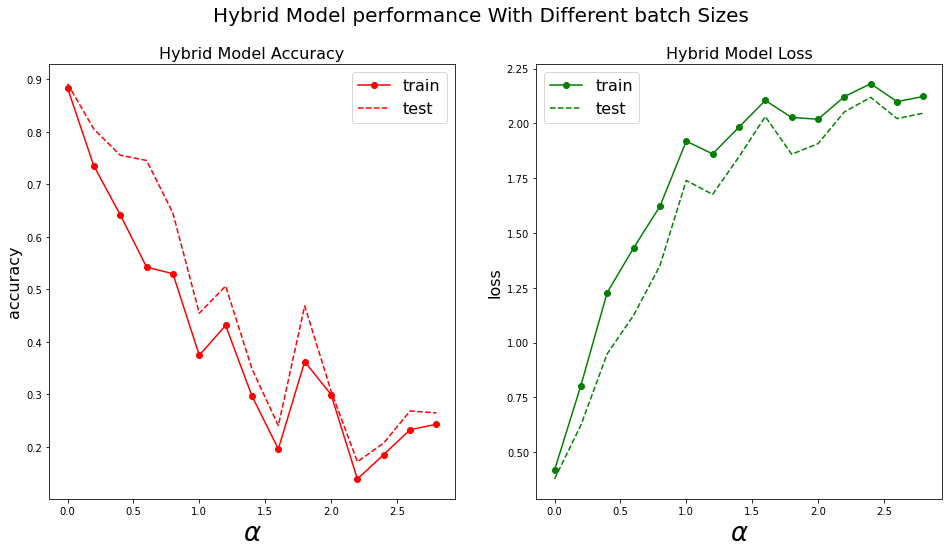

In [63]:
#plotting the loss and the accuracy
f = plt.figure(figsize=(16,8))
plt.suptitle("Hybrid Model performance With Different batch Sizes",fontsize=20)
ax1 = f.add_subplot(1,2,1)
ax1.plot(alpha,acc,'ro-', label='train')
ax1.plot(alpha,v_acc,'r--', label='test')
ax1.legend(loc='upper right',fontsize=16)
ax1.set_xlabel(r'$\alpha$',fontsize=26)
ax1.set_ylabel("accuracy",fontsize=16)
ax1.set_title('Hybrid Model Accuracy',fontsize=16)
xticks=ax1.set_xticks(np.arange(0,3,0.5))
#losses
ax2 = f.add_subplot(1,2,2)
ax2.plot(alpha,loss,'go-',label='train')
ax2.plot(alpha,v_loss,'g--',label='test')
ax2.legend(loc='upper left',fontsize=16)
ax2.set_xlabel(r'$\alpha$',fontsize=26)
ax2.set_ylabel("loss",fontsize=16)
ax2.set_title('Hybrid Model Loss',fontsize=16)
xticks=ax2.set_xticks(np.arange(0,3,0.5))

# **Number of epochs**

In [57]:
lr=[0.001,0.1]
alpha=np.arange(0,3,0.2)
n_lr=np.zeros([len(alpha)])
for i in range(len(alpha)):
  n_lr[i]=lr[0]*(1-alpha[i])+alpha[i]*lr[1]
#plt.plot(alpha,n_batch)

In [58]:
acc=[]
v_acc=[]
loss=[]
v_loss=[]
for i in range(len(alpha)):

  # Sequential Model
  model=keras.models.Sequential(
    [keras.layers.Flatten(),
     keras.layers.Dense(16,activation=tf.nn.relu),
     keras.layers.Dense(16,activation=tf.nn.relu),
     keras.layers.Dense(10,activation=tf.nn.softmax),
    ]
  )
  opt = tf.keras.optimizers.Adam(learning_rate=n_lr[i])
  model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  history= model.fit(train_images, train_labels, validation_split=0.3,batch_size=1024, epochs=3)
  acc.append(history.history['accuracy'][-1])
  loss.append(history.history['loss'][-1])
  v_acc.append(history.history['val_accuracy'][-1])
  v_loss.append(history.history['val_loss'][-1])

Epoch 1/3
42/42 [==============================] - 1s 13ms/step - loss: 2.1301 - accuracy: 0.2881 - val_loss: 1.5323 - val_accuracy: 0.5876
Epoch 2/3
42/42 [==============================] - 0s 9ms/step - loss: 1.3721 - accuracy: 0.6347 - val_loss: 0.9212 - val_accuracy: 0.7887
Epoch 3/3
42/42 [==============================] - 0s 9ms/step - loss: 0.8472 - accuracy: 0.7990 - val_loss: 0.6417 - val_accuracy: 0.8379
Epoch 1/3
42/42 [==============================] - 1s 13ms/step - loss: 1.2130 - accuracy: 0.5837 - val_loss: 0.3659 - val_accuracy: 0.8899
Epoch 2/3
42/42 [==============================] - 0s 9ms/step - loss: 0.3407 - accuracy: 0.8988 - val_loss: 0.3067 - val_accuracy: 0.9053
Epoch 3/3
42/42 [==============================] - 0s 9ms/step - loss: 0.2782 - accuracy: 0.9188 - val_loss: 0.2895 - val_accuracy: 0.9126
Epoch 1/3
42/42 [==============================] - 1s 13ms/step - loss: 1.2067 - accuracy: 0.5816 - val_loss: 0.4024 - val_accuracy: 0.8788
Epoch 2/3
42/42 [=======

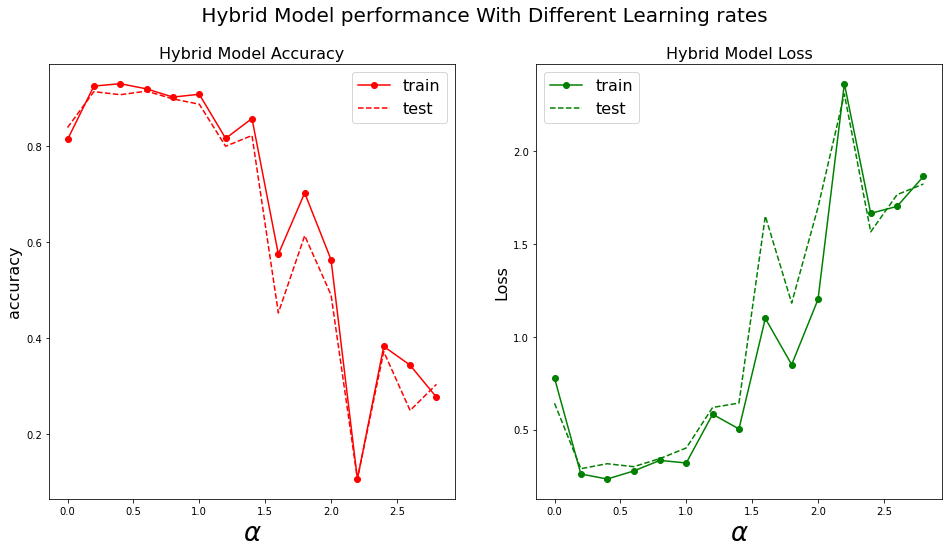

In [59]:
#plotting the loss and the accuracy
f = plt.figure(figsize=(16,8))
plt.suptitle(r" Hybrid Model performance With Different Learning rates",fontsize=20)
ax1 = f.add_subplot(1,2,1)
ax1.plot(alpha,acc,'ro-', label='train')
ax1.plot(alpha,v_acc,'r--', label='test')
ax1.legend(loc='upper right',fontsize=16)
ax1.set_xlabel(r'$\alpha$',fontsize=26)
ax1.set_ylabel("accuracy",fontsize=16)
ax1.set_title('Hybrid Model Accuracy',fontsize=16)
xticks=ax1.set_xticks(np.arange(0,3,0.5))
#losses
ax2 = f.add_subplot(1,2,2)
ax2.plot(alpha,loss,'go-',label='train')
ax2.plot(alpha,v_loss,'g--',label='test')
ax2.legend(loc='upper left',fontsize=16)
ax2.set_xlabel(r'$\alpha$',fontsize=26)
ax2.set_ylabel("Loss",fontsize=16)
ax2.set_title('Hybrid Model Loss',fontsize=16)
xticks=ax2.set_xticks(np.arange(0,3,0.5))